生成n个服从$U(0,\pi)$的随机数$\theta$和n个服从$U(0,\frac{a}{2})$的随机数
令k为实验成功的次数，初始为0，对于每对随机数$(\theta,x)$,如果$x\leqslant \frac{l*\sin \theta}{2}$，那么实验就视为成功，k加1.因此最后针与木条相交的概率$P=\frac{k}{n}$，从而可得$\pi$的估计为$\hat{\pi}=\frac{2ln}{ak}$

In [3]:
import numpy as np
from matplotlib import pyplot as plt


# 定义函数

def buffon(n, l, a):
    k = 0
    theta = np.random.uniform(0, np.pi, n)
    x = np.random.uniform(0, a / 2, n)
    for i in range(n):
        if x[i] <= l * np.sin(theta[i]) / 2:
            k += 1
    if k == 0:
        return 0
    pi = (2 * l * n) / (a * k)
    return pi

取$a=1$，则$l\in (0,1)$

In [6]:
l = np.linspace(0, 1, 101)
a = 1
Pi = np.zeros(101)
n = 1000000
Pi_Exact = np.zeros(101)

In [8]:
for i in range(101):
    Pi[i] = buffon(n, l[i], a)
    Pi_Exact[i] = (np.pi)

绘制图像：

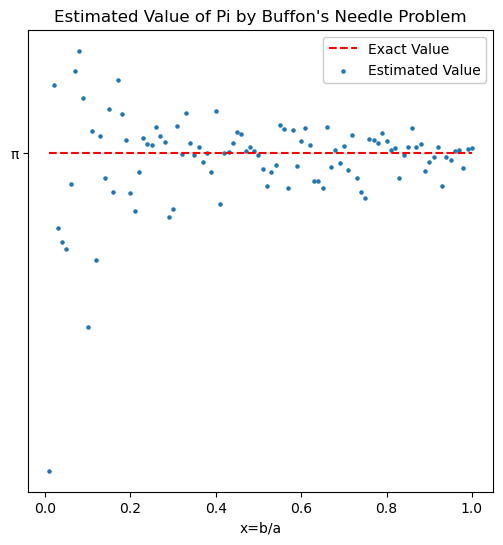

In [24]:
plt.figure(figsize = (6,6))
plt.yticks(
    [13 * np.pi / 16, 14 * np.pi / 16, 15 * np.pi / 16, np.pi, 17 * np.pi / 16, 18 * np.pi / 16, 19 * np.pi / 16],
    ['13π/16', '14π/16', '15π/16', 'π', '17π/16', '18π/16', '19π/16'])
plt.plot(l[1:], Pi_Exact[1:], 'r', linestyle='--', label='Exact Value')
plt.title("Estimated Value of Pi by Buffon's Needle Problem")
plt.scatter(l[1:], Pi[1:], s=5, label='Estimated Value')
plt.legend(framealpha=1)
plt.xlabel('x=b/a')
plt.savefig(r'D:\FileArchiving\大二下\计算物理\瞎写的python\Week11\Pi_value.eps')